# **Insights and Visualisations**

### Objectives

* The objective is to generate insights and visualisations using Python code and the following libraries:
* Matplotlib
* Pandas
* Plotly
* Seaborn

#### The insights and visualiations will relate to the business requirements of which include:

* To see which products sell the most at different times of the year in different geographic regions.

* To identify the different market segments and focus marketing on them to improve sales and customer satisfaction.

* Identify which customers spend the most.

* Identify which items sell the most

* Detect fraud to reduce the loss to the business and to improve customer trust.

#### Inputs

* The ecommerce_transactions_cleaned.csv data set will be loaded for this analysis. Also, Python code will be inputted to obtain the various insights.

#### Outputs

* These will be visualisations and comments to describe the insights.

#### Additional Comments

* The code will focus on certain categories of the DataFrame using .groupby()



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\global-store\\online_store\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\global-store\\online_store'

In [31]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA   
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder






# Load Dataset for Insights and Visualisations

In [32]:
vis_df = pd.read_csv('../online_store/data/cleaned_data/ecommerce_transactions_cleaned.csv') # Load the cleaned dataset
vis_df.head() # Display the first few rows of the DataFrame

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month,Day
0,33554,Isabella Lewis,24,Japan,Toys,579.51,Cash on Delivery,2024-01-16,2024,1,16
1,9428,Elijah Rodriguez,52,Germany,Electronics,78.18,PayPal,2023-04-19,2023,4,19
2,200,Ava Hall,62,UK,Toys,713.08,Debit Card,2024-03-05,2024,3,5
3,12448,Ava Allen,63,Brazil,Grocery,474.14,Credit Card,2024-12-01,2024,12,1
4,39490,Emma Lewis,52,USA,Home & Kitchen,266.15,Debit Card,2024-01-19,2024,1,19


### Insight 1 

### Sales by Geographic Region

In [33]:
vis_df.groupby('Country')['Purchase_Amount'].sum().reset_index(name='Purchases by Country') # Summarize the data by country

,Country,Purchases by Country
0,Australia,496686.65
1,Brazil,469784.05
2,Canada,506940.75
3,France,476764.41
4,Germany,492756.04
5,India,509141.11
6,Japan,523507.32
7,Mexico,503064.92
8,UK,516590.31
9,USA,488936.91


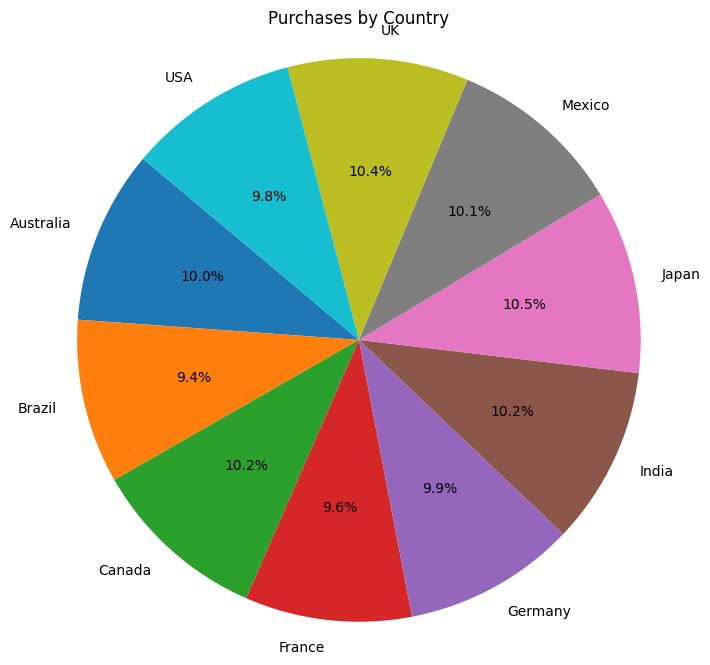

In [34]:

country_data = vis_df.groupby('Country')['Purchase_Amount'].sum().reset_index(name='Purchases by Country') # Prepare data for visualization

# Extract labels and values
labels = country_data['Country']
sizes = country_data['Purchases by Country']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Purchases by Country')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

### The pie chart above shows that the business generates nearly the same amount of sales from different countries.

### Insight 2

### To identify the different market segments and focus marketing on them to improve sales and customer satisfaction.

In [35]:



# Encode Product_Category as ordinal (numerical labels)
vis_df['Product_Category_Code'] = vis_df['Product_Category'].astype('category').cat.codes

# Define preprocessor (only scaling Age and Purchase_Amount)
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), ['Age', 'Purchase_Amount', 'Product_Category_Code'])
])

# Clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('kmeans', kmeans)
])

# Fit pipeline and predict clusters
vis_df['Segment'] = pipeline.fit_predict(vis_df)


c:\Users\rayaf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:


# 3D scatter plot using the original columns
fig = px.scatter_3d(
    vis_df,
    x='Age',
    y='Purchase_Amount',
    z='Product_Category_Code',
    color=vis_df['Segment'].astype(str),
    symbol='Segment',
    title='3D Clustering: Age vs Purchase Amount vs Product Category'
)

# Label axes
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Purchase Amount',
        zaxis_title='Product Category (Encoded)'
    )
)

fig.show()


### The visual shows the customer behaviour patterns and the relationship between the variables.

### Insight 3

#### Identify which customers spend the most.

### Insight 4


#### Identify which items sell the most

### Insight 5

#### Detect fraud to reduce the loss to the business and to improve customer trust.

### Insights and Visuals Conclusions